<a href="https://colab.research.google.com/github/kevincoakley/DT8807/blob/main/annotated_perceptron_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron - PLR - IRIS classification problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class Perceptron(object):

  def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.training_error = []
  
  def predict(self, inputs):
    # The same as: w1 * x1 + w2 * x2 + ... + b 
    # w = weight; x = input value; b = bias
    net = np.dot(inputs, self.weights[1:]) + self.weights[0] 
    # step activation function (all values are either 1 or -1 to match the labels)
    if net >= 0:
      activation = 1
    else:
      activation = -1
    return activation

  def train(self, training_inputs, training_labels):
    # Each time the epoch runs:
    for _ in range(self.epochs):
      # Reset the error to zero
      error = 0
      
      for inputs, label in zip(training_inputs, training_labels):
        # Predict the inputs 
        prediction = self.predict(inputs)
        # update the weights according to the "perceptron learning rule"
        # wi = wi + α ∗ (y−y′) ∗ xi
        # weight = weight + learing_rate (α) * (label (y) - prediction (y')) * inputs (x1)
        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
        # update the bias in a similar way, except without an input as it is not associated with a specific input value
        self.weights[0] += self.learning_rate * (label - prediction)
        # calculate the mean squared error (MSE)
        error += np.square(np.subtract(label, prediction)).mean()
      # for informational purposes
      self.training_error.append(error)  
      print("epoch: %s lrate: %s error: %s" % (_, self.learning_rate, error))

In [3]:
# test perceptron with IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [4]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
x = df.iloc[0:100, [0, 2]].values

# normalize the input values to between 0 and 1
x = (x - np.min(x)) / (np.max(x) - np.min(x))

# convert iris-setosa to 1 and iris-versicolor to -1 for labeling purposes
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


epoch: 0 lrate: 0.1 error: 4.0
epoch: 1 lrate: 0.1 error: 12.0
epoch: 2 lrate: 0.1 error: 8.0
epoch: 3 lrate: 0.1 error: 8.0
epoch: 4 lrate: 0.1 error: 8.0
epoch: 5 lrate: 0.1 error: 8.0
epoch: 6 lrate: 0.1 error: 8.0
epoch: 7 lrate: 0.1 error: 4.0
epoch: 8 lrate: 0.1 error: 0.0
epoch: 9 lrate: 0.1 error: 0.0


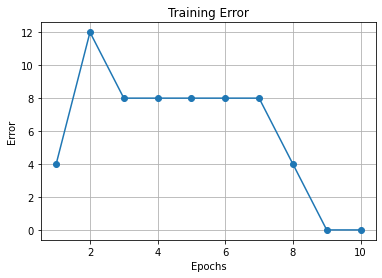

[ 0.2        -0.04666667 -0.55      ]


In [10]:
# use a peceptron to find a decsion boundary to separate the two classe
p = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.1)
p.train(x, y)

# Plot the training error
plt.plot(range(1,len(p.training_error)+1), p.training_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

print(p.weights)

In [29]:
# plot decicion line
x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1

# create an array for the x axis from x_min to x_max for every .1 points
xx1 = np.arange(x1_min, x1_max, 0.1)

# compute the y value for each x using y = mx + b
# where m = -(weight[1]/weight[2]) and b = -(bias/weight[2])
xx2 = -p.weights[1]/p.weights[2] * xx1 - p.weights[0]/p.weights[2]


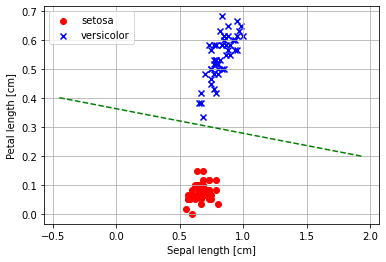

In [30]:
# scatter plot
plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='versicolor')
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [31]:
pred = []
for t in x:
  pred.append(p.predict(t))

print(pred)
error = sum(y - pred)/len(y)
print(error)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
0.0
